# Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Cleaning dataset

#### Checking null values

In [2]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
df.shape

(20640, 10)

In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### Removing null values
<ol>
    <li>Insert mean into the null space.</li>
    <li>Insert median into the null space.</li>
    <li>Insert mode into the null space.</li>
    <li>Remove the rows which contains the null value.</li>
    <li>Remove the entire column</li>
</ol>

##### Insert mean into the null space

In [9]:
X_mean = df['total_bedrooms'].mean()

# To add values to null space - fillna() (if it is in NaN format.)
# To drop the values - dropna()

df['total_bedrooms'] = df['total_bedrooms'].fillna(X_mean)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Data Visualization

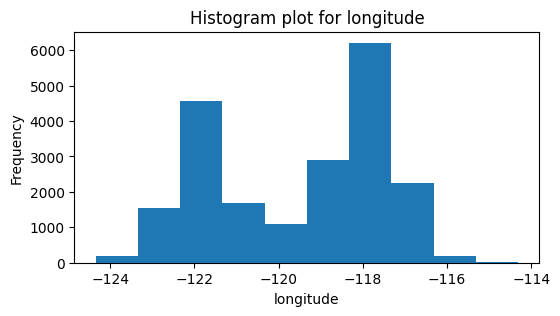

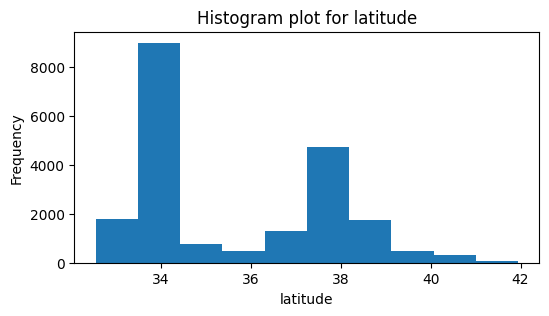

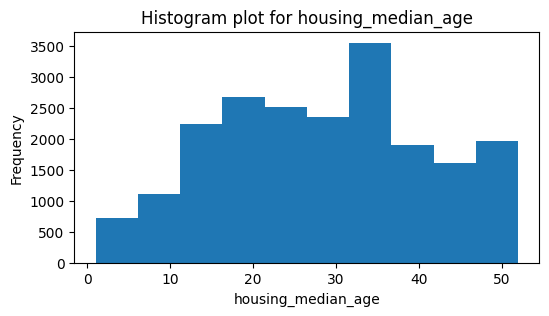

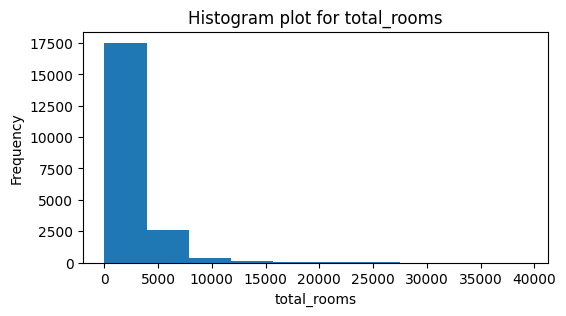

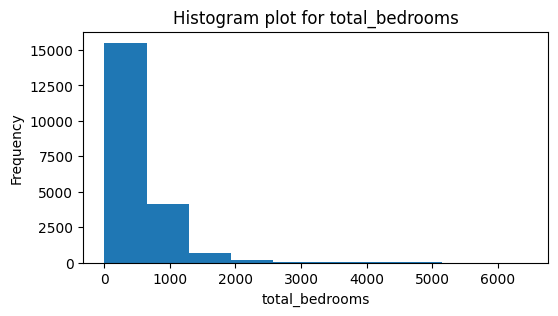

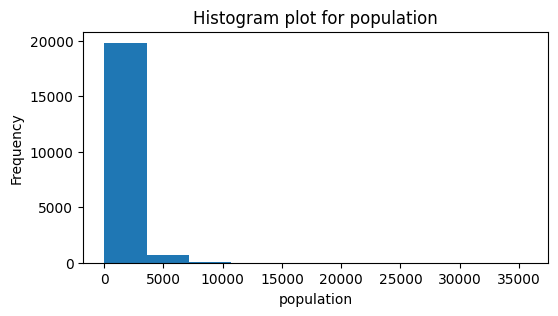

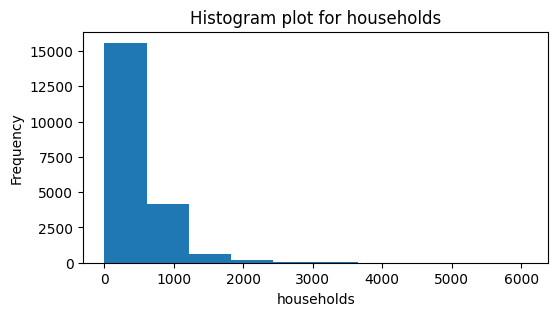

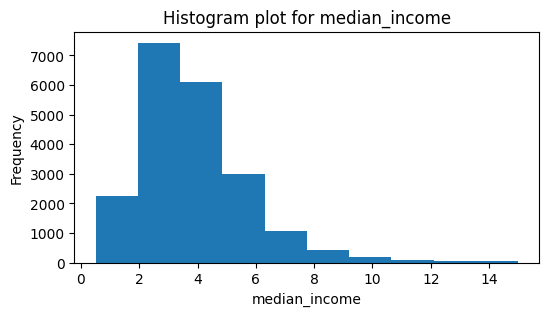

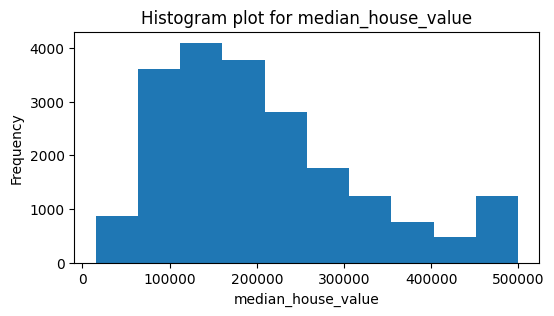

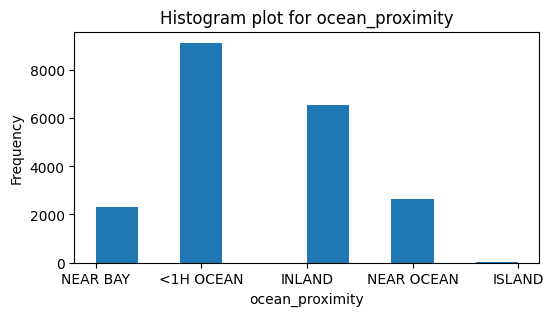

In [18]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
for column in features:
    plt.figure(figsize=(6, 3))
    plt.hist(df[column])
    plt.title(f'Histogram plot for {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

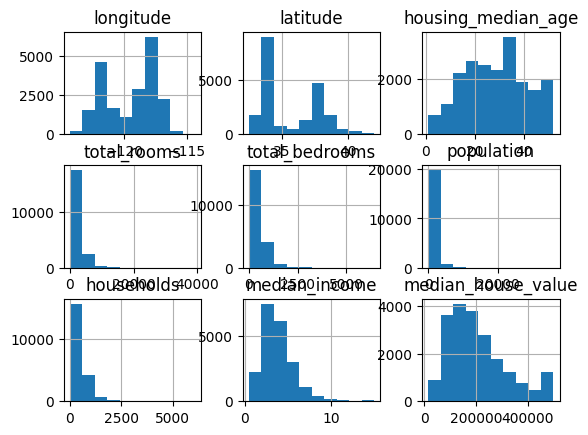

In [24]:
df.hist()

In [37]:
dropping = ['latitude', 'total_bedrooms', 'population', 'households']
df.drop(dropping, axis=1)

df['ocean_proximity'].unique()

near_map = {
    'NEAR BAY' : 0, 
    '<1H OCEAN' : 1, 
    'INLAND' : 2, 
    'NEAR OCEAN' : 3, 
    'ISLAND' : 4
}

df['ocean_proximity'] = df['ocean_proximity'].map(near_map)

In [38]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


# Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df = scalar.fit_transform(df)

df

array([[-1.32783522,  1.05254828,  0.98214266, ...,  2.34476576,
         2.12963148, -1.71472665],
       [-1.32284391,  1.04318455, -0.60701891, ...,  2.33223796,
         1.31415614, -1.71472665],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.7826994 ,
         1.25869341, -1.71472665],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -1.14259331,
        -0.99274649,  0.62663072],
       [-0.87362627,  1.77823747, -0.84539315, ..., -1.05458292,
        -1.05860847,  0.62663072],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.78012947,
        -1.01787803,  0.62663072]])

# Data Splitting

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Model selection

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Accuracy prediction

In [44]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.02640503875968992
